In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from matplotlib.colors import ListedColormap

In [4]:
df_flame = pd.read_csv("flame.txt", sep="\t")
df_jain = pd.read_csv("jain.txt", sep="\t")

In [8]:
column_names = ["x", "y", "type"]

df_flame.columns = column_names
df_jain.columns = column_names

In [9]:
df_flame.info

<bound method DataFrame.info of         x      y  type
0    1.35  26.65     1
1    1.40  23.25     2
2    0.85  23.05     2
3    0.50  22.35     2
4    0.65  21.35     2
..    ...    ...   ...
234  7.50  26.20     1
235  7.50  25.65     1
236  7.05  25.85     1
237  6.90  27.15     1
238  6.15  26.90     1

[239 rows x 3 columns]>

In [10]:
df_jain.info

<bound method DataFrame.info of          x      y  type
0     0.75  15.60     2
1     3.30  15.45     2
2     5.25  14.20     2
3     4.90  15.65     2
4     5.35  15.85     2
..     ...    ...   ...
367  38.75  16.85     1
368  39.00  16.60     1
369  38.25  17.35     1
370  39.50  16.95     1
371  39.90  17.05     1

[372 rows x 3 columns]>

In [30]:
datasets = [df_flame, df_jain]

In [31]:
classifiers = [SVC(kernel="linear", C=0.025), SVC(gamma=2, C=1)]
# TODO: dodać brakujące

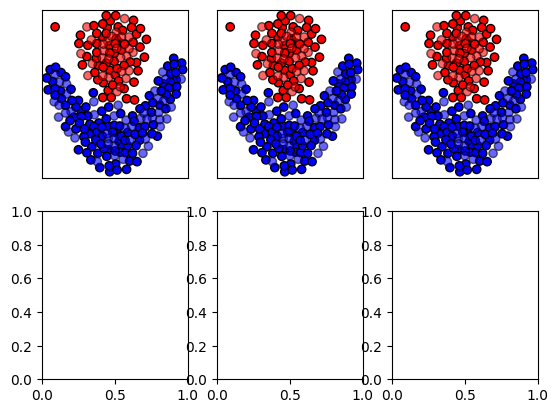

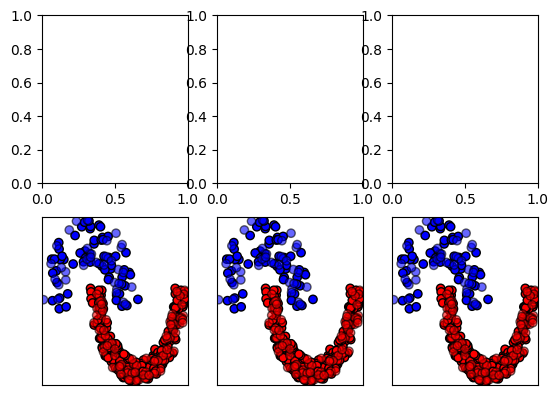

In [50]:
i = 0
for df in datasets:
  j = 0

  X, y = df.iloc[:, 0:-1], df.iloc[:, -1]
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

  x_min, x_max = X['x'].min() - 0.5, X['x'].max() + 0.5
  y_min, y_max = X['y'].min() - 0.5, X['y'].max() + 0.5

  cm = plt.cm.RdBu
  cm_bright = ListedColormap(["#FF0000", "#0000FF"])
  fig, ax = plt.subplots(len(datasets), len(classifiers)+1)

  ax[i, j].scatter(X_train['x'], X_train['y'], c=y_train, cmap=cm_bright, edgecolors="k")  
  ax[i, j].scatter(X_test['x'], X_test['y'], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors="k")
  
  ax[i, j].set_xlim(x_min, x_max)
  ax[i, j].set_ylim(y_min, y_max)
  ax[i, j].set_xticks(())
  ax[i, j].set_yticks(())

  j += 1

  for clf in classifiers:
    clf = make_pipeline(StandardScaler(), clf)
    clf.fit(X_train, y_train)

    score = clf.score(X_test, y_test)

    ax[i, j].scatter(X_train['x'], X_train['y'], c=y_train, cmap=cm_bright, edgecolors="k")
    ax[i, j].scatter(
        X_test['x'],
        X_test['y'],
        c=y_test,
        cmap=cm_bright,
        edgecolors="k",
        alpha=0.6,
    )

    ax[i, j].set_xlim(x_min, x_max)
    ax[i, j].set_ylim(y_min, y_max)
    ax[i, j].set_xticks(())
    ax[i, j].set_yticks(())

    j += 1

  i += 1

plt.show()

#czemu narysowane wykresy mają aids???